In [1]:
from ROOT import TEfficiency, TFile, TDirectory, TCanvas, gStyle, TGraphAsymmErrors, TLegend, EColor, TMarker
import glob
from PIL import Image
import ROOT
import numpy as np

Welcome to JupyROOT 6.26/00


In [36]:
file1 = TFile.Open("output_MuonGunLowPt_Gen_acc_finePt_v2_11.root")
file2 = TFile.Open("output_MuonGunHighPt_Gen_acc_finePt_v2_11.root")
fileEMB1 = TFile.Open("output_MuonGunEMBLowPt_Gen_acc_finePt_v2_11.root")
fileEMB2 = TFile.Open("output_MuonGunEMBHighPt_Gen_acc_finePt_v2_11.root")

file3 = TFile.Open("output_pTHat2_JPsi_v2_11_GenMatched.root")

In [3]:
def getCombinedEff(trig, f1, f2):
    h1 = f1.Get("%s/pt" %(trig) )
    h2 = f2.Get("%s/pt" %(trig) )
    p_h1 = h1.GetCopyPassedHisto()
    t_h1 = h1.GetCopyTotalHisto()
    p_h2 = h2.GetCopyPassedHisto()
    t_h2 = h2.GetCopyTotalHisto()

    for i in range (27,97):
        p_h1.SetBinContent(i, p_h2.GetBinContent(i))
        t_h1.SetBinContent(i, t_h2.GetBinContent(i))

#    h3 = TEfficiency(p_h1, t_h1)
    return TEfficiency(p_h1, t_h1)

In [4]:
hist1 = getCombinedEff("HLT_HIL1Mu0_v", file1, file2)
histEMB1 = getCombinedEff("HLT_HIL1Mu0_v", fileEMB1, fileEMB2)
hist2 = getCombinedEff("HLT_HIL2Mu0_v", file1, file2)
histEMB2 = getCombinedEff("HLT_HIL2Mu0_v", fileEMB1, fileEMB2)
hist3 = getCombinedEff("HLT_HIL3Mu0_v", file1, file2)
histEMB3 = getCombinedEff("HLT_HIL3Mu0_v", fileEMB1, fileEMB2)
hist1.Draw();histEMB1.Draw();hist2.Draw();histEMB2.Draw();hist3.Draw();histEMB3.Draw();

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [5]:
canv = TCanvas("c1", "" ,700, 600);
canv.SetGrid()
canv_tmp1 = TCanvas("ctmp1", "" ,700, 600);
canv_tmp2 = TCanvas("ctmp2", "" ,700, 600);

gStyle.SetEndErrorSize(0)
range_up = 1.0
range_do = 0.0
marker_size = 1.2
marker_style = 20
marker_style2 = 22
leg = TLegend(0.15,0.12,0.45,0.35)
leg.SetBorderSize(0)
leg.SetHeader("")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [32]:
def compareSample(level, h1, h2, _canv, _leg, _desc1 = "", _desc2 = ""):
    leg.Clear()
    h1.SetLineColor(EColor.kBlue)
    h2.SetLineColor(EColor.kRed)
    canv_tmp1.cd()
    h1.Draw()
    canv_tmp1.Update()
    h1C = h1.GetPaintedGraph();canv_tmp1.Clear()
    canv_tmp2.cd()
    h2.Draw();
    canv_tmp2.Update()
    h2C = h2.GetPaintedGraph();canv_tmp2.Clear()
    _canv.cd()
    h1C.GetXaxis().SetRangeUser(0,12)
    _leg.SetHeader("Level %s" % (level))
    _leg.AddEntry(h1C, ("Non-Embedded" if _desc1=="" else _desc1) )
    _leg.AddEntry(h2C, ("Embedded" if _desc2 == "" else _desc2) )
    h1C.Draw("APE")
    h2C.Draw("PE")
    leg.DrawClone()
    canv.Draw()

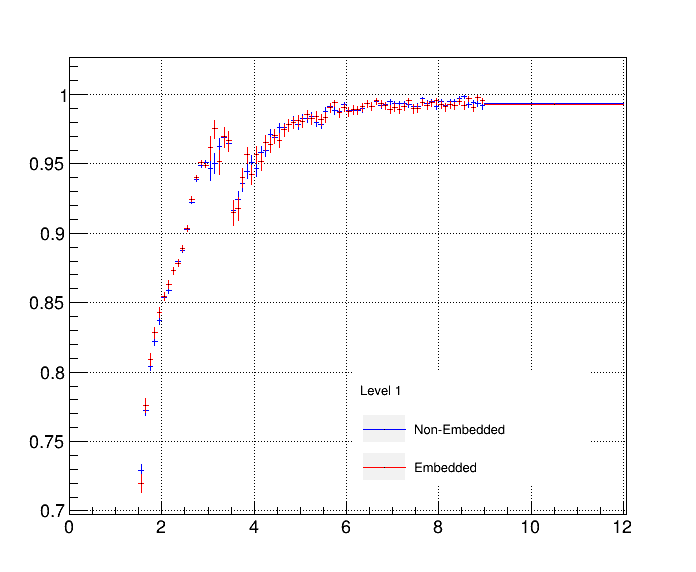

In [23]:
leg.SetTextSize(0.024)
leg.SetX1(0.51);leg.SetX2(0.85);leg.SetY1(0.15);leg.SetY2(0.35);
compareSample('1', hist1, histEMB1, canv, leg)

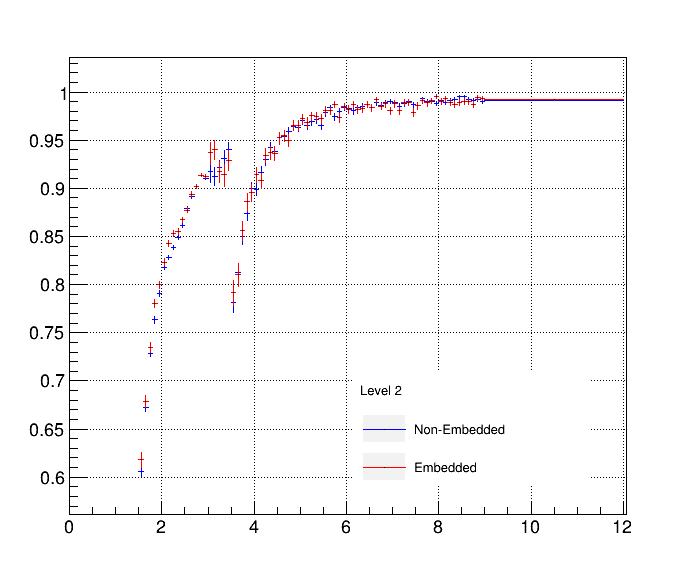

In [24]:
compareSample('2', hist2, histEMB2, canv, leg)

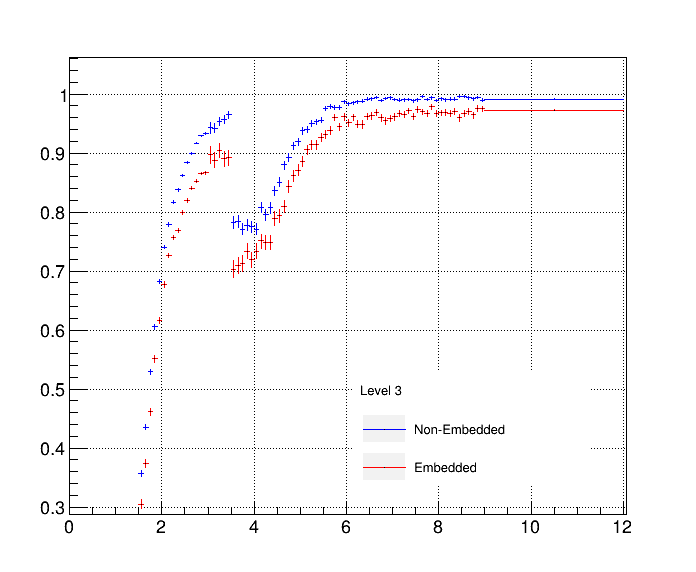

In [25]:
compareSample('3', hist3, histEMB3, canv, leg)

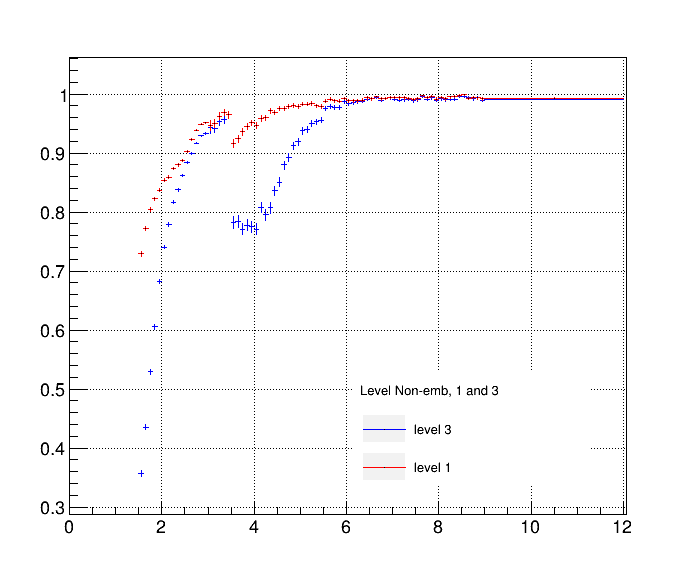

In [34]:
compareSample('Non-emb, 1 and 3', hist3, hist1, canv, leg, "level 3", "level 1")

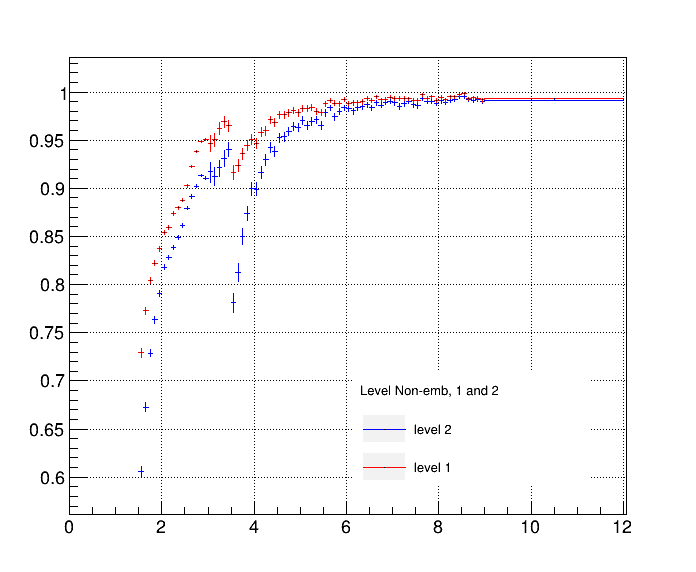

In [35]:
compareSample('Non-emb, 1 and 2', hist2, hist1, canv, leg, "level 2", "level 1")

In [47]:
histeta1l = file1.Get("HLT_HIL1Mu0_v/eta")
histeta2l = file1.Get("HLT_HIL2Mu0_v/eta")
histeta3l = file1.Get("HLT_HIL3Mu0_v/eta")
histeta1h = file2.Get("HLT_HIL1Mu0_v/eta")
histeta2h = file2.Get("HLT_HIL2Mu0_v/eta")
histeta3h = file2.Get("HLT_HIL3Mu0_v/eta")

In [50]:
histeta1l.SetLineColor(EColor.kRed)
histeta2l.SetLineColor(EColor.kGreen)
histeta3l.SetLineColor(EColor.kBlue)
histeta1h.SetLineColor(EColor.kRed)
histeta2h.SetLineColor(EColor.kGreen)
histeta3h.SetLineColor(EColor.kBlue)

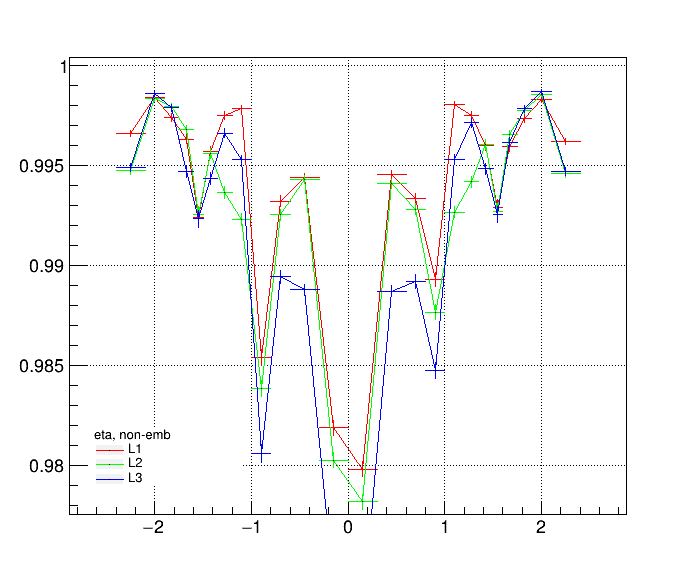

In [59]:
canv.Clear()
canv.cd()
histeta1h.Draw()
histeta2h.Draw("same")
histeta3h.Draw("same")
canv.Draw()
__h1 = histeta1h.GetPaintedGraph()
__h2 = histeta2h.GetPaintedGraph()
__h3 = histeta3h.GetPaintedGraph()

__h1.Draw("APEL")
__h2.Draw("PEL")
__h3.Draw("PEL")
leg.Clear()
leg.SetX1(0.13);leg.SetX2(0.35);leg.SetY1(0.15);leg.SetY2(0.25);
leg.SetHeader("eta, non-emb")
leg.AddEntry(__h1, "L1")
leg.AddEntry(__h2, "L2")
leg.AddEntry(__h3, "L3")

leg.DrawClone()

In [37]:
histJP1 = file3.Get("HLT_HIL1Mu0_v/pt")
histJP2 = file3.Get("HLT_HIL2Mu0_v/pt")
histJP3 = file3.Get("HLT_HIL3Mu0_v/pt")

In [ ]:
canv.Clear()
canv.cd()
histJP1.SetLineColor(k